Plot of teff/mass v rotaion for Meats targets


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [49]:
# host_tab = Table.read('host_properties.tsv')
from astropy.io.votable import parse
votable = parse('host_properties.votable')
table = votable.get_first_table()
data = table.array

In [50]:
data.dtype.names

('pl_name',
 'hostname',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_lum',
 'st_lumerr1',
 'st_lumerr2',
 'st_rotp',
 'st_rotperr1',
 'st_rotperr2',
 'st_rotplim')

In [51]:
names = np.genfromtxt('all_names.txt', delimiter = '/n', dtype=str)
names

array(['LTT 1445 A', 'GJ 486', 'GJ 367', 'GJ 341', 'GJ 4102', 'TOI-260',
       'L 168-9', 'TOI-776', 'TOI-836', 'K2-18', 'TOI-402', 'K2-141',
       'TOI-178', 'HD 80606', 'TOI-421', 'WASP-166', 'HIP 67522',
       'HATS-72', 'WASP-121', 'WASP-63', 'NGTS-10', 'Kepler-51',
       'HD 189733', 'GJ 1214', 'LHS 3844', '55 Cnc', 'GJ 357', 'GJ 1132',
       'L 98-59', 'TRAPPIST-1', 'LHS 1140', 'WASP-178', 'V1298 Tau',
       'K2-141', 'WD 1856+534', 'HD 209458', 'WASP-96'], dtype='<U11')

In [52]:
names = np.genfromtxt('all_names.txt', delimiter = '/n', dtype=str)
for name in names:
    if name in data['hostname']:
        print (name, 'YES')
    else:
        print(name, 'NO')

LTT 1445 A YES
GJ 486 YES
GJ 367 YES
GJ 341 NO
GJ 4102 NO
TOI-260 NO
L 168-9 YES
TOI-776 YES
TOI-836 NO
K2-18 YES
TOI-402 NO
K2-141 YES
TOI-178 YES
HD 80606 YES
TOI-421 YES
WASP-166 YES
HIP 67522 YES
HATS-72 YES
WASP-121 YES
WASP-63 YES
NGTS-10 YES
Kepler-51 YES
HD 189733 YES
GJ 1214 YES
LHS 3844 YES
55 Cnc YES
GJ 357 YES
GJ 1132 YES
L 98-59 YES
TRAPPIST-1 YES
LHS 1140 YES
WASP-178 YES
V1298 Tau YES
K2-141 YES
WD 1856+534 YES
HD 209458 YES
WASP-96 YES


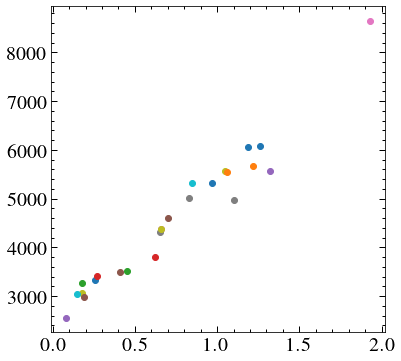

In [55]:
plt.figure(figsize=(6,6))

for name in names:
    if name in data['hostname']:
        row = data[np.where(data['hostname'] == name)[0][0]]
        plt.scatter(row['st_mass'], row['st_teff'])
        

In [56]:
import mplcyberpunk
plt.style.use('cyberpunk')



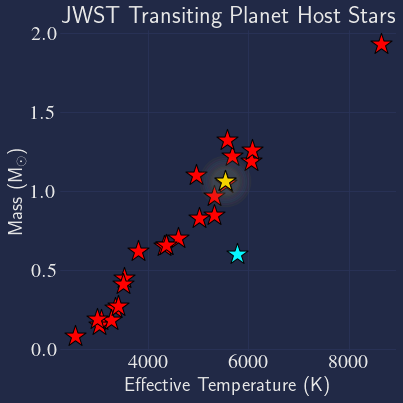

In [95]:
plt.figure(figsize=(6,6))

for name in names:
    if name in data['hostname']:
        row = data[np.where(data['hostname'] == name)[0][0]]
        plt.scatter(row['st_teff'], row['st_mass'], marker='*', c='C4', s=500, edgecolor='k')
        if name == 'WASP-96':
            plt.scatter(row['st_teff'], row['st_mass'], marker='*', c='C2', s=500, edgecolor='k', zorder=100) 
        if name == 'WD 1856+534':
            mass = 0.6
            plt.scatter(row['st_teff'], mass, marker='*', c='C0', s=500, edgecolor='k', zorder=100)
        # print(name, row['st_mass'])
mplcyberpunk.make_scatter_glow()

plt.title('JWST Transiting Planet Host Stars')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Mass (M$_{\odot}$)')
plt.tight_layout()
plt.savefig('plots/jwst_hosts_cp.png', dpi=150)
# mplcyberpunk.add_glow_effects()
